In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import spatial_maps as sp
import septum_mec.analysis.data_processing as dp
import septum_mec.analysis.registration
import expipe
import os
import pathlib
import numpy as np
import exdir
import pandas as pd
import optogenetics as og
import quantities as pq
import shutil
from distutils.dir_util import copy_tree
import seaborn as sns
import pycwt
from septum_mec.analysis.stimulus_response import stimulus_response_latency, compute_response
from septum_mec.analysis.plotting import despine
from tqdm import tqdm_notebook as tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

12:06:46 [I] klustakwik KlustaKwik2 version 0.2.6


In [3]:
%matplotlib inline
plt.rc('axes', titlesize=12)
plt.rcParams.update({
    'font.size': 12, 
    'figure.figsize': (2.5, 2), 
    'figure.dpi': 150
})

In [4]:
data_loader = dp.Data()
actions = data_loader.actions
project = data_loader.project

In [5]:
output = pathlib.Path('output/response-example')
(output / 'figures').mkdir(parents=True, exist_ok=True)

In [6]:
def raster(spike_times, stim_times, window, ax, std, **kwargs):
    spike_times = np.array(spike_times)
    stim_times = np.array(stim_times)
    trials = [spike_times[(spike_times >= t - 1e-3) & (spike_times <= t + window + 1e-3)] - t
              for t in stim_times]
    spikes = [s for t in trials for s in t]
    spike_trials = [s for i, t in enumerate(trials) for s in [i]*len(t)]
    ax.scatter(spikes, spike_trials, **kwargs)
    from scipy.stats import gaussian_kde
    
    times = np.arange(0, window, 1e-4)

    kernel = gaussian_kde(spikes, std)
    pdf = kernel(times)
    m = max(spike_trials)
    pdf = (pdf - pdf.min()) / (pdf - pdf.min()).max() * m
    ax.plot(times, pdf, 'k', lw=1, alpha=.5)
    ax.set_xlim(0, window)

In [9]:
colors = ['#993404', '#d95f02', '#980043', '#e7298a']

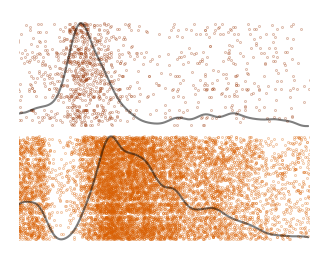

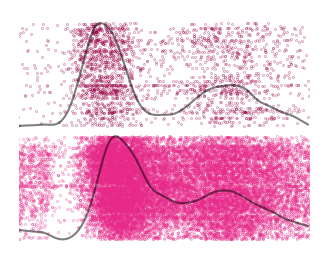

In [10]:
action_id_11 = '1833-120619-2'
action_id_30 = '1833-120619-4'

grid_neuron_11 = data_loader.spike_train(action_id_11, 6, 169)
inter_neuron_11 = data_loader.spike_train(action_id_11, 5, 145)

grid_neuron_30 = data_loader.spike_train(action_id_30, 6, 120)
inter_neuron_30 = data_loader.spike_train(action_id_30, 5, 122)

stim_times_11 = data_loader.stim_times(action_id_11)
stim_times_30 = data_loader.stim_times(action_id_30)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace':0})
dot_size = 0.02
std = 0.1
axs = axs.ravel()
raster(grid_neuron_11, stim_times_11, 0.03, s=dot_size, ax=axs[0], color=colors[0], std=std)
raster(inter_neuron_11, stim_times_11, 0.03, s=dot_size, ax=axs[1], color=colors[1], std=std)


sns.despine(left=True, bottom=True)
for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
figname = f'raster-{action_id_11}_11'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace':0})
axs = axs.ravel()
raster(grid_neuron_30, stim_times_30, 0.03, s=dot_size, ax=axs[0], color=colors[2], std=std)
raster(inter_neuron_30, stim_times_30, 0.03, s=dot_size, ax=axs[1], color=colors[3], std=std)

sns.despine(left=True, bottom=True)
for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
figname = f'raster-{action_id_30}_30'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

# NS inhibited vs not inhibited

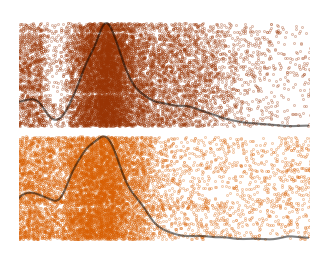

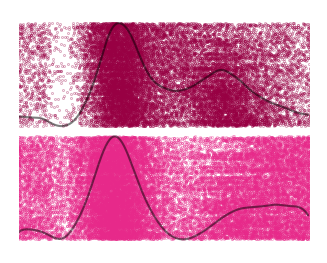

In [11]:
action_id_11 = '1833-260619-2'
action_id_30 = '1833-260619-4'

inter_neuron_inhibited_11 = data_loader.spike_train(action_id_11, 5, 154)
inter_neuron_11 = data_loader.spike_train(action_id_11, 2, 168)

inter_neuron_inhibited_30 = data_loader.spike_train(action_id_30, 5, 212)
inter_neuron_30 = data_loader.spike_train(action_id_30, 2, 216)

stim_times_11 = data_loader.stim_times(action_id_11)
stim_times_30 = data_loader.stim_times(action_id_30)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace':0})
dot_size = 0.02
std = 0.1
axs = axs.ravel()
raster(inter_neuron_inhibited_11, stim_times_11, 0.03, s=dot_size, ax=axs[0], color=colors[0], std=std)
raster(inter_neuron_11, stim_times_11, 0.03, s=dot_size, ax=axs[1], color=colors[1], std=std)


sns.despine(left=True, bottom=True)
for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
figname = f'raster-{action_id_11}_11'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace':0})
axs = axs.ravel()
raster(inter_neuron_inhibited_30, stim_times_30, 0.03, s=dot_size, ax=axs[0], color=colors[2], std=std)
raster(inter_neuron_30, stim_times_30, 0.03, s=dot_size, ax=axs[1], color=colors[3], std=std)

sns.despine(left=True, bottom=True)
for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
figname = f'raster-{action_id_30}_30'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

# LFP

In [12]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m / sd)


def select_and_clean(anas, width=500, threshold=2):
    anas = np.array(anas)

    for ch in range(anas.shape[1]):
        idxs, = np.where(abs(anas[:, ch]) > threshold)
        for idx in idxs:
            anas[idx-width:idx+width, ch] = 0 # TODO AR model prediction
    return anas

def zscore(a):
    return (a - a.mean()) / a.std()

def mask_coi(power, freqs, coi):
    periods = 1 / freqs
    for i in range(power.shape[1]):
        mask = periods > coi[i]
        power[mask, i] = np.nan

def wavelet(data, sampling_rate, f_start, f_stop, f_step=.5, morlet=20):
    mother = pycwt.Morlet(morlet) # Morlet size
    freqs = np.arange(f_start, f_stop + f_step, f_step) # Frequency range

    wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(
        data, 1. / sampling_rate, freqs=freqs, wavelet=mother)

    power = (np.abs(wave)) ** 2
    power /= scales[:, None] #rectify the power spectrum according to suggestions proposed by Liu et al. (2007)

    mask_coi(power, freqs, coi)

    return freqs, power


In [14]:
from septum_mec.analysis.plotting import lighten_color

In [15]:
from matplotlib.colors import ListedColormap

In [16]:
def tfr(lfp, stim_times, tlim, flim, color, threshold=2, **kwargs):
    clean_lfp = select_and_clean(lfp, threshold=threshold)
    snls = signaltonoise(clean_lfp)
    best_channel = np.argmax(snls)
    snl = snls[best_channel]
    sampling_rate = lfp.sampling_rate.magnitude
    times = np.arange(0, lfp.shape[0]) / sampling_rate
    mask = (times > tlim[0]) & (times < tlim[1])
    signal = zscore(clean_lfp[mask, best_channel].ravel())
    times = times[mask]
    freqs, power = wavelet(signal, sampling_rate, *flim)
    cmap = [lighten_color(color, i) for i in np.linspace(0, 1, 100)]
#     print(times.shape, freqs.shape, power.shape)
    plt.contourf(times, freqs, power, levels=100, cmap=ListedColormap(cmap), **kwargs),
    cbar = plt.colorbar(ticks=[])
#     plt.xticks([])
#     plt.yticks([])
    plt.axvspan(stim_times[0], tlim[-1], alpha=.1, color='k')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    cbar.ax.set_yticklabels([])
    cbar.ax.set_ylabel('Wavelet power')
    cbar.outline.set_visible(False)
    despine()

/home/mikkel/.virtualenvs/expipe/lib/python3.6/site-packages/pycwt/wavelet.py:88: RuntimeWarning: divide by zero encountered in true_divide
  sj = 1 / (wavelet.flambda() * freqs)
/home/mikkel/.virtualenvs/expipe/lib/python3.6/site-packages/pycwt/wavelet.py:104: RuntimeWarning: invalid value encountered in multiply
  np.conjugate(wavelet.psi_ft(sj_col * ftfreqs)))


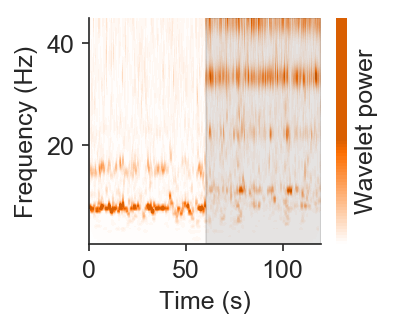

In [17]:
fig = plt.figure()

tfr(
    data_loader.lfp(action_id_11, 6), 
    data_loader.stim_times(action_id_11), 
    [0, 120], [0, 45], color='#d95f02', vmax=500)

figname = f'tfr-{action_id_11}_11'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

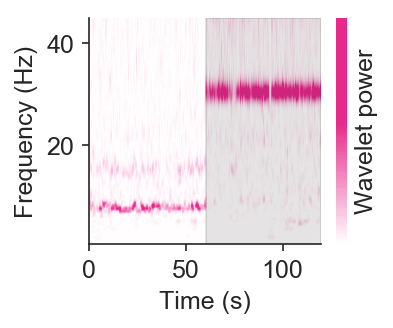

In [18]:
fig = plt.figure()

tfr(
    data_loader.lfp(action_id_30, 6), 
    data_loader.stim_times(action_id_30), 
    [0, 120], [0, 45], color='#e7298a', vmax=700)

figname = f'tfr-{action_id_30}_30'.replace(' ', '-')
fig.savefig(
    output / 'figures' / f'{figname}.png', 
    bbox_inches='tight', transparent=True)
fig.savefig(
    output / 'figures' / f'{figname}.svg', 
    bbox_inches='tight', transparent=True)

# Save to expipe

In [50]:
action = project.require_action("stimulus-response")

In [51]:
copy_tree(output, str(action.data_path()))

['/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/tfr-1833-120619-4_30.svg',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-2-1833-120619-4_30.svg',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/tfr-1833-120619-2_11.png',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-2-1833-120619-4_30.png',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-4_30.svg',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-2-1833-120619-4_11.svg',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-4_30.png',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/raster-1833-120619-2_11.png',
 '/media/storage/expipe/septum-mec/actions/stimulus-response/data/figures/tfr-1833-120619-2_11.svg',
 '/media/storage/expipe/septum-

In [52]:
septum_mec.analysis.registration.store_notebook(action, "10-calculate-stimulus-response.ipynb")